# ism Import and Plotting

This example shows how to measure an impedance spectrum and then plot it in Bode and Nyquist using the Python library [matplotlib](https://matplotlib.org/).

In [7]:
import sys
from thales_remote.connection import ThalesRemoteConnection
from thales_remote.script_wrapper import PotentiostatMode,ThalesRemoteScriptWrapper

from zahner_analysis.file_import.ism_import import IsmImport
from zahner_analysis.plotting.impedance_plot import nyquistPlotter,bodePlotter

import matplotlib.pyplot as plt
import numpy as np


# Connect Python to the already launched Thales-Software

In [ ]:
if __name__ == "__main__":
    zenniumConnection = ThalesRemoteConnection()
    zenniumConnection.connectToTerm("localhost", "ScriptRemote")
    
    zahnerZennium = ThalesRemoteScriptWrapper(zenniumConnection)
    zahnerZennium.forceThalesIntoRemoteScript()
    
    zahnerZennium.calibrateOffsets()

# Setting the parameters for the measurement

After the connection with Thales, the naming of the files of the measurement results is set.

Measure EIS spectra with a sequential number in the file name that has been specified.
Starting with number 1.

In [ ]:
    zahnerZennium.setEISNaming("counter")
    zahnerZennium.setEISCounter(1)
    zahnerZennium.setEISOutputPath(r"C:\THALES\temp\test1")
    zahnerZennium.setEISOutputFileName("spectra")

Setting the parameters for the spectra.
Alternatively a rule file can be used as a template.

In [ ]:
    zahnerZennium.setPotentiostatMode(PotentiostatMode.POTMODE_POTENTIOSTATIC)
    zahnerZennium.setAmplitude(10e-3)
    zahnerZennium.setPotential(0)
    zahnerZennium.setLowerFrequencyLimit(0.01)
    zahnerZennium.setStartFrequency(1000)
    zahnerZennium.setUpperFrequencyLimit(200000)
    zahnerZennium.setLowerNumberOfPeriods(3)
    zahnerZennium.setLowerStepsPerDecade(5)
    zahnerZennium.setUpperNumberOfPeriods(20)
    zahnerZennium.setUpperStepsPerDecade(10)
    zahnerZennium.setScanDirection("startToMax")
    zahnerZennium.setScanStrategy("single")

After setting the parameters, the measurement is started.  

<div class="alert alert-block alert-info">
<b>Note:</b> If the potentiostat is set to potentiostatic before the impedance measurement and is switched off, the measurement is performed at the open circuit voltage/potential.
</div>

After the measurement, the potentiostat is switched off and the amplitude is deactivated.

In [29]:
    zahnerZennium.enablePotentiostat()
    zahnerZennium.measureEIS()
    zahnerZennium.disablePotentiostat()
    
    zahnerZennium.setAmplitude(0)
    
    zenniumConnection.disconnectFromTerm()

# Importing the ism file

Import the spectrum from the previous measurement with the class [IsmImport](https://doc.zahner.de/zahner_analysis/file_import/#zahner_analysis.file_import.ism_import.IsmImport). This was saved under the set path and name with the number expanded.  
The measurement starts at 1 therefore the following path results: "C:\THALES\temp\test1\spectra_0001.ism".

In [2]:
    ismFile = IsmImport(r"C:\THALES\temp\test1\spectra_0001.ism")
    
    impedanceFrequencies = ismFile.getFrequencyArray()
    
    impedanceAbsolute = ismFile.getImpedanceArray()
    impedancePhase = ismFile.getPhaseArray()
    
    impedanceComplex = ismFile.getComplexImpedanceArray()

The Python datetime object of the measurement date is output to the console next.

In [3]:
    print("Measurement end time: " + str(ismFile.getMeasurementEndDateTime()))

Measurement end time: 2021-10-14 13:21:30.032500


# Displaying the measurement results

For this test, the Zahner test box was measured in the lin position.
For plotting, the [zahner_analysis](https://github.com/Zahner-elektrik/Zahner-Analysis-Python) package is used for [quick and easy plotting](https://doc.zahner.de/zahner_analysis/plotting/index.html#visualize-data).
Alternatively, you can create your own diagram with [matplotlib](https://matplotlib.org/).

## Nyquist Plot

The Nyquist plot is created with the [nyquistPlotter](https://doc.zahner.de/zahner_analysis/plotting/index.html#zahner_analysis.plotting.impedance_plot.nyquistPlotter) function.

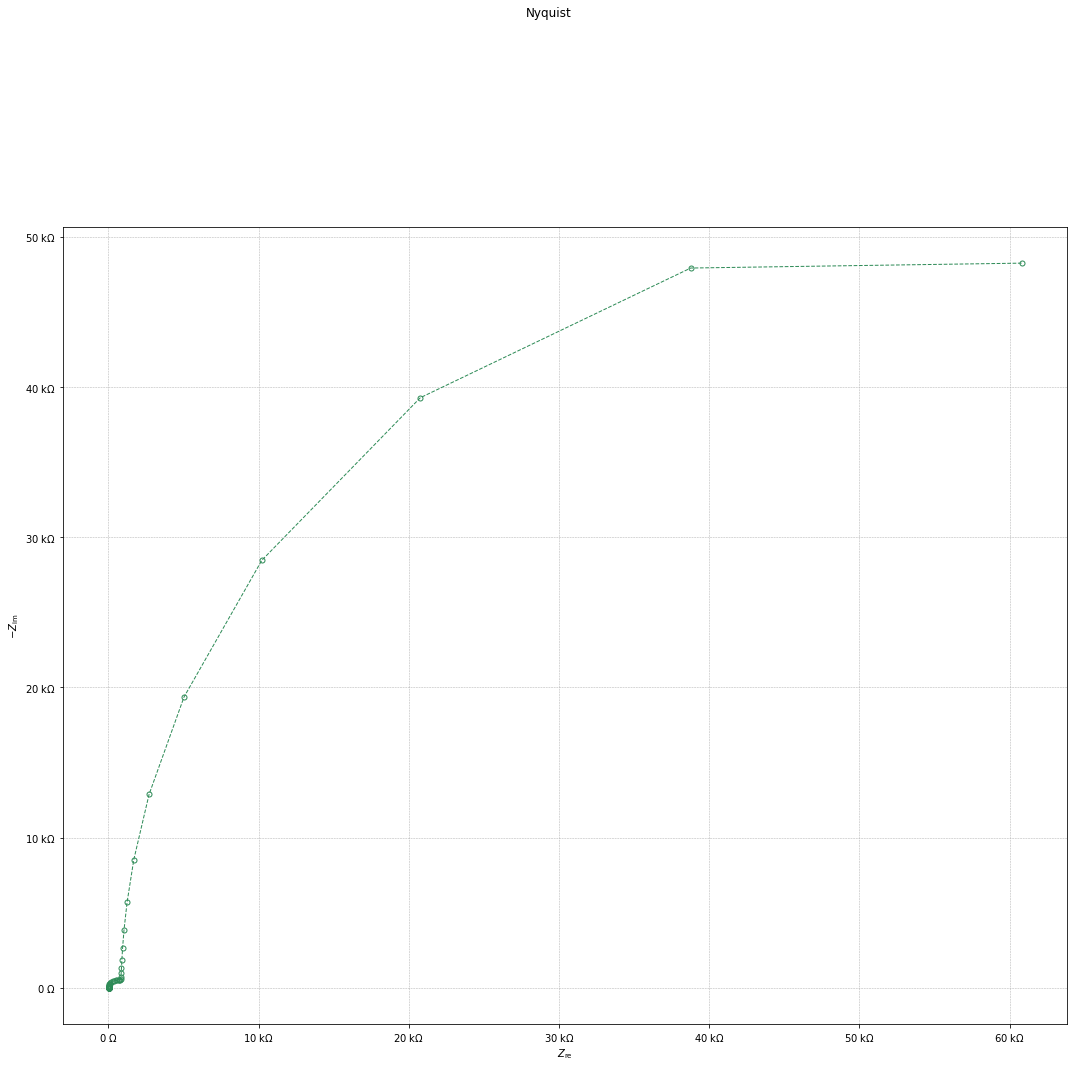

In [13]:
    (figNyquist, nyquistAxis) = nyquistPlotter(impedanceObject=ismFile)
    
    figNyquist.suptitle("Nyquist")
    figNyquist.set_size_inches(18, 18)

    plt.show()

    figNyquist.savefig("nyquist.svg")

## Bode Plot

There is also a function ([bodePlotter](https://doc.zahner.de/zahner_analysis/plotting/index.html#zahner_analysis.plotting.impedance_plot.bodePlotter)) to create a plot for the Bode representation.

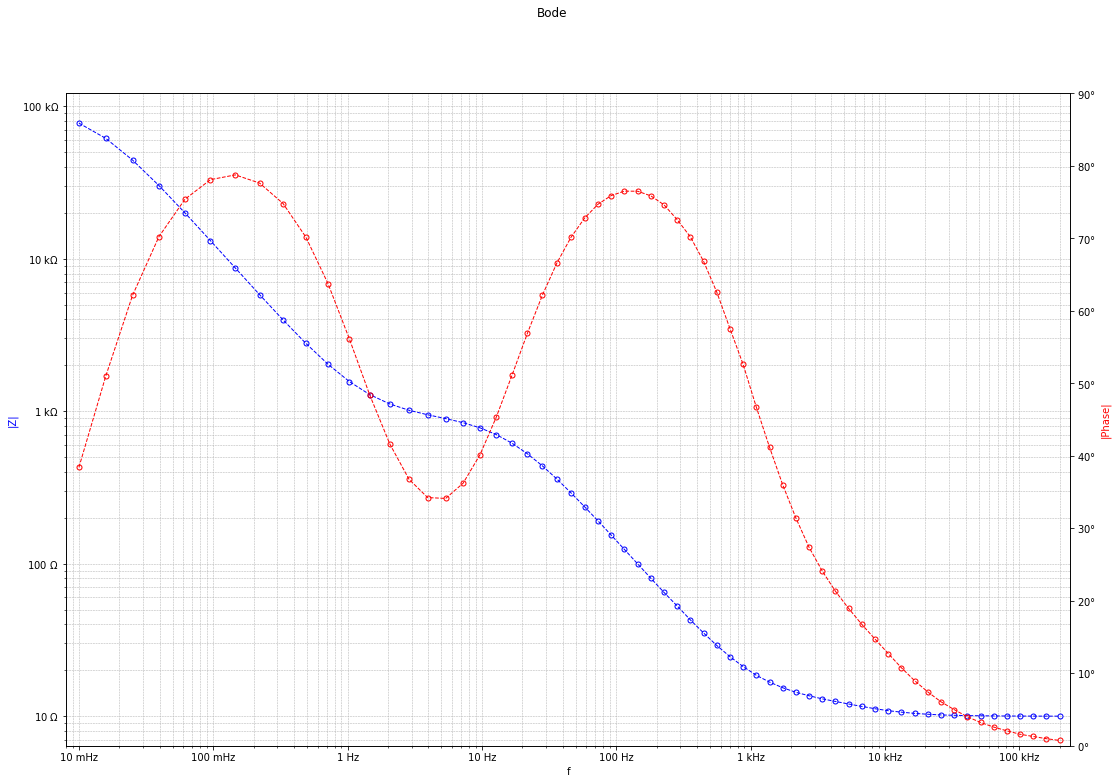

In [12]:
    (figBode, (impedanceAxis, phaseAxis)) = bodePlotter(impedanceObject=ismFile)
    
    figBode.suptitle("Bode")
    figBode.set_size_inches(18, 12)
    
    plt.show()
    
    figBode.savefig("bode.svg")